<a href="https://colab.research.google.com/github/cryssoga/DSWP/blob/master/Exercicio_6_120yearsOlympicHistory_NB10_DATA_TRANSFORMATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NB10__04_3DP_3_Data_Transformation

Exercício 6 - 120 years of Olympic history: athletes and results
120 years of Olympic history: athletes and results

Trate adequadamente as variáveis 'sex', 'season', 'team', 'city', 'sport' e 'medal';

Aplique as transformações que acabamos de estudar nos campos/colunas numéricas 'height' e 'weight'. Cuidado com os Missing Values contidos nas variáveis!

Verifique/avalie o impacto dos outliers nestas colunas.

Neste caso, qual transformação é mais adequado diante dos outliers?

In [2]:
import pandas as pd
from google.colab import drive
drive.mount ('/content/drive')
df_atleta = pd.read_csv('/content/drive/My Drive/dswp/athlete_events.csv')
df_atleta.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
df_atleta.info()

In [ ]:
df_atleta.isna().sum()      # Observe que somente 4 colunas apresentan NaNs: 'Age', 'Height', 'Weight' e 'Medal' 

In [ ]:
df_atleta.isna().sum().sum()     # somatória total de NaNs existentes no dataframe

In [ ]:
# Verificar nomes das colunas:
df_atleta.columns

In [3]:
# Convertendo nomes das colunas para letras minúsculas:
df_atleta.columns = df_atleta.columns.str.lower()
df_atleta.head()

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
df_atleta.sex.unique()

In [4]:
# Aterando na coluna 'sex': 'M' => 0, 'F' => 1
df_atleta['sex'] = df_atleta['sex'].map({'M':0, 'F':1}) 

In [ ]:
df_atleta.head()

In [ ]:
df_atleta.season.unique()

In [5]:
# Aterando na coluna 'season': 'Summer' => 0, 'Winter' => 1
df_atleta['season'] = df_atleta['season'].map({'Summer':0, 'Winter':1})

In [ ]:
df_atleta.head()

In [ ]:
# Qtde de NaNs na coluna 'medal'
df_atleta.medal.isna().sum()

In [ ]:
df_atleta.medal.unique()

In [ ]:
df_atleta.height.isna().sum()

In [ ]:
df_atleta.weight.isna().sum()

In [ ]:
# Calculando a média de todas as colunas    
df_atleta.mean(axis=0)

In [ ]:
# Verificando as linhas em que se encontram as NaNs da coluna 'height'
df_atleta.height[df_atleta.height.isna()]

In [6]:
# Criando coluna 'age_1' que recebe os dados da coluna 'age' com NaN's preenchidos com a mediana
df_atleta['age_1'] = df_atleta['age'].fillna(df_atleta['age'].median())
df_atleta.head()

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal,age_1
0,1,A Dijiang,0,24.0,180.0,80.0,China,CHN,1992 Summer,1992,0,Barcelona,Basketball,Basketball Men's Basketball,NaN,24.0
1,2,A Lamusi,0,23.0,170.0,60.0,China,CHN,2012 Summer,2012,0,London,Judo,Judo Men's Extra-Lightweight,NaN,23.0
2,3,Gunnar Nielsen Aaby,0,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,0,Antwerpen,Football,Football Men's Football,NaN,24.0
3,4,Edgar Lindenau Aabye,0,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,0,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,34.0
4,5,Christine Jacoba Aaftink,1,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,1,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,21.0


In [7]:
# Criando coluna 'height_1' que recebe os dados da coluna 'height' com NaN's preenchidos com a mediana
df_atleta['height_1'] = df_atleta['height'].fillna(df_atleta['height'].median())
df_atleta.head()

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal,age_1,height_1
0,1,A Dijiang,0,24.0,180.0,80.0,China,CHN,1992 Summer,1992,0,Barcelona,Basketball,Basketball Men's Basketball,NaN,24.0,180.0
1,2,A Lamusi,0,23.0,170.0,60.0,China,CHN,2012 Summer,2012,0,London,Judo,Judo Men's Extra-Lightweight,NaN,23.0,170.0
2,3,Gunnar Nielsen Aaby,0,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,0,Antwerpen,Football,Football Men's Football,NaN,24.0,175.0
3,4,Edgar Lindenau Aabye,0,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,0,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,34.0,175.0
4,5,Christine Jacoba Aaftink,1,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,1,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,21.0,185.0


In [8]:
# Criando coluna 'weight_1' que recebe os dados da coluna 'weight' com NaN's preenchidos com a mediana
df_atleta['weight_1'] = df_atleta['weight'].fillna(df_atleta['weight'].median())
df_atleta.head()

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal,age_1,height_1,weight_1
0,1,A Dijiang,0,24.0,180.0,80.0,China,CHN,1992 Summer,1992,0,Barcelona,Basketball,Basketball Men's Basketball,NaN,24.0,180.0,80.0
1,2,A Lamusi,0,23.0,170.0,60.0,China,CHN,2012 Summer,2012,0,London,Judo,Judo Men's Extra-Lightweight,NaN,23.0,170.0,60.0
2,3,Gunnar Nielsen Aaby,0,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,0,Antwerpen,Football,Football Men's Football,NaN,24.0,175.0,70.0
3,4,Edgar Lindenau Aabye,0,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,0,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,34.0,175.0,70.0
4,5,Christine Jacoba Aaftink,1,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,1,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,21.0,185.0,82.0


In [ ]:
# Conferindo 'age_1' nas linhas  em que 'age' = NaNs
df_atleta[df_atleta['age'].isna()]

In [9]:
# Criando coluna 'medal_1' que recebe dados da colunaa 'medal' com os NaNs preenchidos com 'no_medal'
df_atleta['medal_1'] = df_atleta['medal'].fillna('no_medal')
df_atleta.head()

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal,age_1,height_1,weight_1,medal_1
0,1,A Dijiang,0,24.0,180.0,80.0,China,CHN,1992 Summer,1992,0,Barcelona,Basketball,Basketball Men's Basketball,NaN,24.0,180.0,80.0,no_medal
1,2,A Lamusi,0,23.0,170.0,60.0,China,CHN,2012 Summer,2012,0,London,Judo,Judo Men's Extra-Lightweight,NaN,23.0,170.0,60.0,no_medal
2,3,Gunnar Nielsen Aaby,0,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,0,Antwerpen,Football,Football Men's Football,NaN,24.0,175.0,70.0,no_medal
3,4,Edgar Lindenau Aabye,0,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,0,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,34.0,175.0,70.0,Gold
4,5,Christine Jacoba Aaftink,1,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,1,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,21.0,185.0,82.0,no_medal


In [10]:
# Substituindo os dados da coluna 'medal_1' com números 1, 2, 3 e 0:
df_atleta['medal_1'] = df_atleta['medal_1'].map({'Gold': 1, 'Silver' : 2, 'Bronze' : 3, 'no_medal': 0.0})

In [ ]:
df_atleta.head()

In [ ]:
df_atleta.columns

In [16]:
len(df_atleta.sport.unique())

66

In [17]:
len (df_atleta.noc.unique())

230

In [18]:
df_atleta1 = df_atleta.copy()

In [19]:
df_atleta1 = df_atleta1.drop(axis=1, columns={'id', 'name', 'age', 'height', 'weight', 'team', 'noc', 'games','year', 'season', 'city', 'sport', 'event', 'medal'})

In [20]:
df_atleta1.head()

,sex,age_1,height_1,weight_1,medal_1
0,0,24.0,180.0,80.0,0.0
1,0,23.0,170.0,60.0,0.0
2,0,24.0,175.0,70.0,0.0
3,0,34.0,175.0,70.0,1.0
4,1,21.0,185.0,82.0,0.0


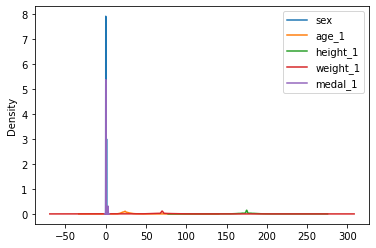

In [21]:
df_atleta1.plot(kind = 'kde')

In [ ]:
# Aplicar a trasformação StandardScaler e MinMaxScaler nos campos/colunas numéricas 'height' e 'weight'.

In [24]:
# Transformação 1: StandardScaler:
import numpy as np
from sklearn.preprocessing import StandardScaler
np.set_printoptions(precision = 3)

In [25]:
# array com as preditoras, da seguinte forma: X = [coluna1, coluna2, ..., colunaN]
# OBSERVAR : A1_scale, A1_scale_transform, A1_scale_fit_transform --> São arrays multidimensionais (do tipo NumPy)!

A1_scale = StandardScaler().fit_transform(df_atleta1) # Combinação dos métodos fit() + transform()

A1_scale_fit = StandardScaler().fit(df_atleta1) # Aplica o fit() separadamente
A1_scale_transform = A1_scale_fit.transform(df_atleta1) # Aplica o transform() separadamente.
A1_scale_fit_transform = StandardScaler().fit(df_atleta1).transform(df_atleta1) # Aplica fit().transform() encadeado


In [26]:
df_A1_scale = pd.DataFrame(A1_scale, columns = ['sex','age_1','height_1', 'weight_1', 'medal_1'])

In [ ]:
df_A1_scale.head()

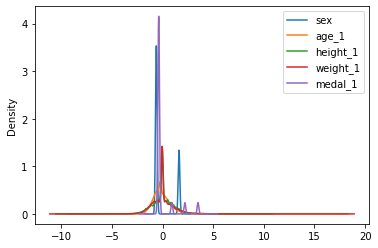

In [27]:
df_A1_scale.plot(kind = 'kde')

In [ ]:
df_A1_scale_fit = pd.DataFrame(A1_scale, columns = ['sex','age_1','height_1', 'weight_1', 'medal_1'])
df_A1_scale_transform = pd.DataFrame(A1_scale, columns = ['sex','age_1','height_1', 'weight_1', 'medal_1'])
df_A1_scale_fit_transform = pd.DataFrame(A1_scale, columns = ['sex','age_1','height_1', 'weight_1', 'medal_1'])

In [ ]:
df_A1_scale_fit.head()

In [ ]:
df_A1_scale_transform.head()

In [ ]:
df_A1_scale_fit_transform.head()

In [ ]:
#  Transformação 2: MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# aplicando a transformação => array
A1_MinMaxScaler = MinMaxScaler().fit_transform(df_atleta1)

# convertendo array em dataframe:
df_atleta1_MinMaxScaler = pd.DataFrame(A1_MinMaxScaler, columns = ['sex','age_1','height_1', 'weight_1', 'medal_1'])

In [ ]:
# Gráfico
df_atleta1_MinMaxScaler.plot(kind = 'kde')

In [ ]:
# RobustScaler
from sklearn.preprocessing import RobustScaler

# aplicando a transformação RobustScaler => array
A1_RobustScaler = RobustScaler().fit_transform(df_atleta1)

# convertendo array em dataframe:
df_A1_RobustScaler = pd.DataFrame(A1_RobustScaler, columns = ['sex','age_1','height_1', 'weight_1', 'medal_1'])

# Gráfico
df_A1_RobustScaler.plot(kind = 'kde')

In [29]:
df_atleta1.describe()

,sex,age_1,height_1,weight_1,medal_1
count,271116.000000,271116.000000,271116.00000,271116.000000,271116.000000
mean,0.274871,25.502493,175.26374,70.539500,0.293192
std,0.446450,6.287361,9.27917,12.578184,0.773445
min,0.000000,10.000000,127.00000,25.000000,0.000000
25%,0.000000,22.000000,170.00000,63.000000,0.000000
50%,0.000000,24.000000,175.00000,70.000000,0.000000
75%,1.000000,28.000000,180.00000,75.000000,0.000000
max,1.000000,97.000000,226.00000,214.000000,3.000000


In [28]:
df_A1_scale.describe()

,sex,age_1,height_1,weight_1,medal_1
count,2.711160e+05,2.711160e+05,2.711160e+05,2.711160e+05,2.711160e+05
mean,-9.041921e-14,2.026203e-16,2.108842e-15,-2.723428e-15,-2.219183e-14
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-6.156829e-01,-2.465664e+00,-5.201309e+00,-3.620521e+00,-3.790736e-01
25%,-6.156829e-01,-5.570699e-01,-5.672651e-01,-5.994120e-01,-3.790736e-01
50%,-6.156829e-01,-2.389709e-01,-2.842280e-02,-4.289178e-02,-3.790736e-01
75%,1.624213e+00,3.972272e-01,5.104195e-01,3.546226e-01,-3.790736e-01
max,1.624213e+00,1.137164e+01,5.467769e+00,1.140552e+01,3.499686e+00


In [30]:
df_atleta1.corr()

,sex,age_1,height_1,weight_1,medal_1
sex,1.000000,-0.173139,-0.447047,-0.464050,0.007272
age_1,-0.173139,1.000000,0.105174,0.158762,0.022929
height_1,-0.447047,0.105174,1.000000,0.786674,0.067346
weight_1,-0.464050,0.158762,0.786674,1.000000,0.068046
medal_1,0.007272,0.022929,0.067346,0.068046,1.000000


In [31]:
df_A1_scale.corr()

,sex,age_1,height_1,weight_1,medal_1
sex,1.000000,-0.173139,-0.447047,-0.464050,0.007272
age_1,-0.173139,1.000000,0.105174,0.158762,0.022929
height_1,-0.447047,0.105174,1.000000,0.786674,0.067346
weight_1,-0.464050,0.158762,0.786674,1.000000,0.068046
medal_1,0.007272,0.022929,0.067346,0.068046,1.000000
